In [3]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [4]:
import pandas as pd
import sqlite3
import io

In [7]:
df = pd.read_csv(io.BytesIO(uploaded['Sample - Superstore.csv']), encoding='latin1')
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
conn = sqlite3.connect(':memory:')
df.to_sql('sales', conn, index=False, if_exists='replace')

9994

In [10]:
# 🔍 1. Total Sales by Category
query1 = '''
SELECT category, SUM(sales) AS total_sales
FROM sales
GROUP BY category
ORDER BY total_sales DESC
'''
pd.read_sql(query1, conn)

,category,total_sales
0,Technology,836154.0330
1,Furniture,741999.7953
2,Office Supplies,719047.0320


In [11]:
# 🔍 2. Top 10 States by Profit
query2 = '''
SELECT state, SUM(profit) AS total_profit
FROM sales
GROUP BY state
ORDER BY total_profit DESC
LIMIT 10
'''
pd.read_sql(query2, conn)


,state,total_profit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


In [12]:
# 🔍 3. Most Profitable Products
query3 = '''
SELECT product_name, SUM(profit) AS total_profit
FROM sales
GROUP BY product_name
ORDER BY total_profit DESC
LIMIT 5
'''
pd.read_sql(query3, conn)


,product_name,total_profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,6983.8836
3,Canon PC1060 Personal Laser Copier,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766


In [17]:
query = '''
SELECT strftime('%Y-%m', order_date) AS month, SUM(sales) AS monthly_sales
FROM sales
WHERE order_date IS NOT NULL
GROUP BY month
ORDER BY month
'''
monthly_sales = pd.read_sql(query, conn)
monthly_sales['month'] = pd.to_datetime(monthly_sales['month'], format='%Y-%m')
monthly_sales.set_index('month', inplace=True)
monthly_sales.head(10)
monthly_sales.tail(10)
monthly_sales.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, NaT to NaT
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   monthly_sales  1 non-null      float64
dtypes: float64(1)
memory usage: 16.0 bytes


In [18]:
# Step 1: Ensure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Step 2: Remove NaT values
df = df[df['order_date'].notna()]

# Step 3: Group by month
monthly_sales = df.resample('M', on='order_date').agg({'sales': 'sum'})
monthly_sales.rename(columns={'sales': 'monthly_sales'}, inplace=True)
monthly_sales.head()


/tmp/ipython-input-18-140056394.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='order_date').agg({'sales': 'sum'})


,monthly_sales
order_date,
2014-01-31,14236.895
2014-02-28,4519.892
2014-03-31,55691.009
2014-04-30,28295.345
2014-05-31,23648.287


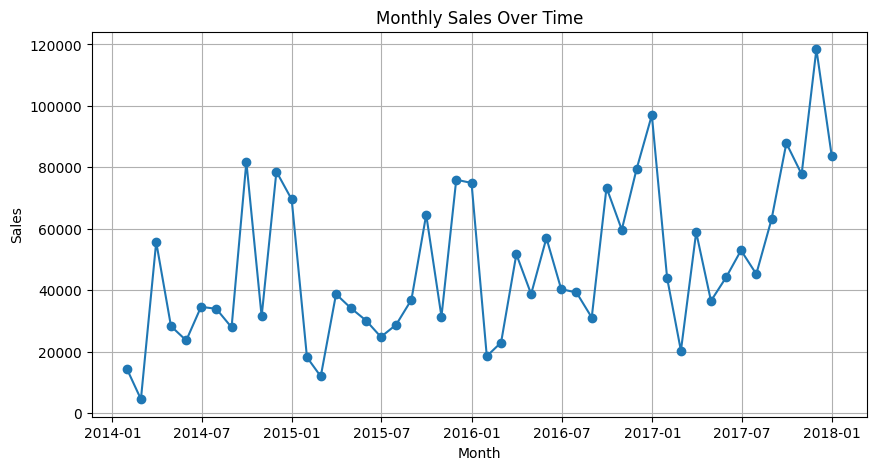

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales['monthly_sales'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [21]:
monthly_sales.to_csv('monthly_sales.csv')
from google.colab import files
files.download('monthly_sales.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>